<a href="https://colab.research.google.com/github/Shreyas3108/Upgrad_DS/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
import statsmodels.api as sm

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [0]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.02, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

#result = stepwise_selection(X, y)

#print('resulting features:')
#print(result)

In [0]:
df = pd.read_csv('https://github.com/Shreyas3108/Upgrad_DS/raw/master/weatherHistory.csv')

In [6]:
df.shape

(96453, 12)

In [7]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [8]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [0]:
df1 = df[~df['Precip Type'].isnull()]

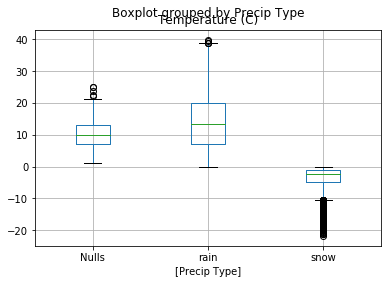

In [16]:
df.fillna('Nulls').boxplot(by = ['Precip Type'],column=['Temperature (C)'])

In [17]:

df1['precip_type_num'] = df1['Precip Type'].apply(lambda x:1 if x == 'rain' else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df1.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'precip_type_num'],
      dtype='object')

In [0]:
X = df1[['Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'precip_type_num']]

In [0]:
y = df1['Temperature (C)']

In [21]:
### Statsmodel 

X1 = sm.add_constant(X)

reg = sm.OLS(y , X1).fit()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
r2_score(reg.predict(X1) , y)

0.35783353814865126

In [26]:
lreg = LinearRegression()
lreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
r2_score(lreg.predict(X) , y)

0.35783353814867225

In [28]:
reg.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                 2.490e+04
Date:                Fri, 28 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:18:38   Log-Likelihood:            -3.0778e+05
No. Observations:               95936   AIC:                         6.156e+05
Df Residuals:                   95929   BIC:                         6.156e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     20.8553      0.211     98.723      0.000      20.441      21.269
Humidity                 -26.4189      0.110   -241.178      0.000     -26.634     -26.204
Wind Speed (km/h)         -0.2106      0.003    -72.979      0.000      -0.216      -0.205
Wind Bearing (degrees)     0.0022      0.000     12.128      0.000       0.002       0.003
Visibility (km)            0.1703      0.005     32.919      0.000       0.160       0.180
Loud Cover                      0          0        nan        nan           0           0
Pressure (millibars)      -0.0008      0.000     -5.031      0.000      -0.001      -0.001
precip_type_num           12.8695      0.065    197.095      0.000      12.742      12.997
==============================================================================
Omnibus:                     1236.526   Durbin-Watson:                   0.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1221.245
Skew:                          -0.255   Prob(JB):                    6.46e-266
Kurtosis:                       2.786   Cond. No.                     7.90e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.62e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
result = stepwise_selection(X, y)

#print('resulting features:')
#print(result)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: 
The current behaviour of 'Serie

Add  precip_type_num                with p-value 0.0
Add  Humidity                       with p-value 0.0
Add  Wind Speed (km/h)              with p-value 0.0
Add  Visibility (km)                with p-value 1.43562e-239
Add  Wind Bearing (degrees)         with p-value 4.57835e-34
Add  Pressure (millibars)           with p-value 4.88516e-07


In [30]:
result

['precip_type_num',
 'Humidity',
 'Wind Speed (km/h)',
 'Visibility (km)',
 'Wind Bearing (degrees)',
 'Pressure (millibars)']

In [32]:
lreg1 = LinearRegression()
lreg1.fit(X[result] , y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
r2_score(lreg1.predict(X[result]) , y)

0.3578335381486225

In [0]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [38]:
lreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
r2_score(lreg.predict(X) , y)

0.6498212316698555

In [52]:
result = stepwise_selection(X,y)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  LSTAT                          with p-value 5.0811e-88
Add  RM                             with p-value 3.47226e-27
Add  PTRATIO                        with p-value 1.64466e-14
Add  DIS                            with p-value 1.66847e-05
Add  NOX                            with p-value 5.48815e-08
Add  CHAS                           with p-value 0.000265473
Add  B                              with p-value 0.000771946
Add  ZN                             with p-value 0.00465162


In [42]:
X.columns.shape

(13,)

In [53]:
lreg1.fit(X[result] , y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
r2_score(lreg1.predict(X[result]) , y)

0.6237418327202918